# New Clusters

In [12]:
#from data_loader import load_bolsa_m , load_bolsa
import os
import hdbscan
import itertools
import numpy as np
import pandas as pd
# import prettytable
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import mixture

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.metrics import silhouette_samples, silhouette_score, consensus_score
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
from sklearn.cluster import AgglomerativeClustering, DBSCAN, estimate_bandwidth, MeanShift, KMeans, MiniBatchKMeans, SpectralClustering
from sklearn import metrics
# from sklearn.neighbors import kneighbors_graph

from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D

%matplotlib nbagg
import warnings

# Utiles

In [166]:
def plot_cls(name, data, labels):
    colores = ["r","g","b"]
    col = [colores[x] for x in labels]
    fig = plt.figure()
#     ax = fig.gca(projection="3d")
    ax = Axes3D(fig)
    for i, j in enumerate(np.unique(labels)):
        m = (j==labels)
        c = np.ma.array(col, mask=m)
        x = np.ma.array(d_plots.iloc[:,0], mask=m)
        y = np.ma.array(d_plots.iloc[:,1], mask=m)
        z = np.ma.array(d_plots.iloc[:,2], mask=m)
        ax.scatter(x, y, z, s=12, marker="o", c=c, alpha=1,label="Clase {0}({1} items)".format(i, np.sum(m)))

#     colores2 =["red", "green", "blue"]
#     col2 = [colores2[x] for x in labels]
#     ax.scatter(data[0], data[2], c=col2, zdir='y', zs=1.5)
#     ax.scatter(data[1], data[2], c=col2, zdir='x', zs=-1.5)
#     ax.scatter(data[0], data[1], c=col2, zdir='z', zs=-1)
    
    plt.legend(loc=4)
    plt.title("Clusters por "+name)
    plt.show()

In [156]:
pca_totales = pd.DataFrame()
datos = []
files = os.listdir("SojaData/")

for i in range(15):
    for j in range(12):
        pca_temp = np.array([])

        n_file = "Prueba Claudio Bolsa {0}-{1}.csv".format(i, j)
        if n_file not in files:
            continue
        df = pd.read_csv("SojaData/{0}".format(n_file), header=2, index_col=0, skip_blank_lines=True, dtype=np.float64)
        pca_file = RandomizedPCA(n_components=3, random_state=10).fit_transform(df)
        pca_file = np.array(pca_file)
        
        n_cols = pca_file.shape[0] * pca_file.shape[1]
        pca_file = pca_file.reshape(1, n_cols)
        pca_temp = np.append(pca_temp, pca_file)
        datos = np.append(datos,pca_file)
        pca_totales = pca_totales.append(pd.DataFrame(pca_temp).T, ignore_index=True)

pca_totales.dropna(axis=0, how="all", inplace=True)
pca_totales.fillna(value=0,axis=0, inplace=True)
pca_totales[:3]

,0,1,2,3,4,5,6,7,8,9,...,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502
0,1.210584,0.003070,0.002220,1.208118,0.003027,0.001775,1.205593,0.002613,0.001122,1.204444,...,0.000329,-1.355995,-0.000088,0.000337,-1.358188,0.000006,0.000420,-1.360605,0.000275,0.000460
1,0.609058,0.001500,-0.000060,0.607829,0.001533,0.000197,0.606337,0.001441,0.000502,0.605258,...,0.001126,-0.638279,-0.000704,0.000917,-0.638991,-0.000801,0.000858,-0.639748,-0.000940,0.000883
2,0.776400,-0.000373,0.000843,0.775407,-0.000454,0.000783,0.774353,-0.000620,0.000696,0.773768,...,-0.000195,-0.807156,-0.001530,-0.000475,-0.807473,-0.001439,-0.000621,-0.808225,-0.001470,-0.000665


In [143]:
new_index = []
for i, j in itertools.product(range(12),range(10)):
    new_index.append('Bolsa {0}-{1}'.format(i+1,j+1))
new_index.remove('Bolsa 4-3')
# pca_totales.reindex(index=new_index)
pca_totales.index = new_index
pca_totales[-3:]

,0,1,2,3,4,5,6,7,8,9,...,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502
Bolsa 12-8,-0.750927,0.002217,-0.000298,-0.749776,0.002080,-0.000231,-0.748280,0.001724,-0.000194,-0.747193,...,0.001892,0.833048,0.000524,0.001580,0.832841,0.000625,0.001406,0.833074,0.000700,0.001036
Bolsa 12-9,0.478332,0.001590,0.000127,0.477347,0.001787,-0.000033,0.476177,0.001869,-0.000075,0.475167,...,-0.000605,-0.550923,0.000362,-0.000642,-0.552574,0.000503,-0.000697,-0.554207,0.000355,-0.000662
Bolsa 12-10,0.747773,0.000007,0.001453,0.746906,0.000129,0.001319,0.745875,0.000324,0.000993,0.745049,...,0.000588,-0.743016,0.000294,0.000619,-0.742925,0.000122,0.000553,-0.743091,-0.000094,0.000448


KMeans S_Score: 0.765883


<IPython.core.display.Javascript object>


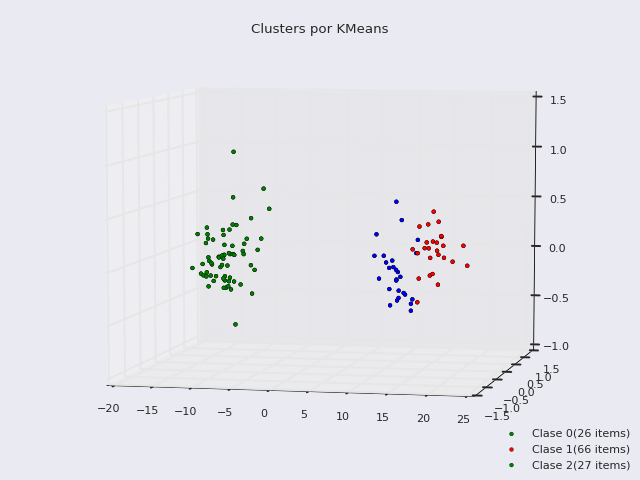

MShift S_Score: 0.877614


<IPython.core.display.Javascript object>


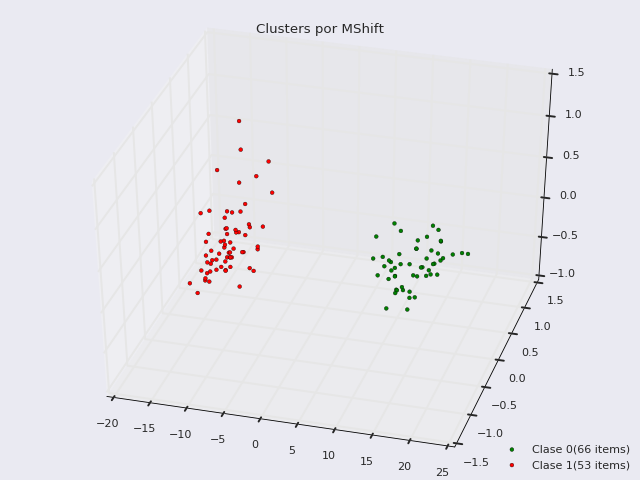

In [167]:
pca = RandomizedPCA(n_components=3, random_state=10)
datos = pca.fit_transform(pca_totales)

km_ = KMeans(n_clusters=3, random_state=10)
km_.fit(datos)
km_cls = km_.predict(datos)

km_score = silhouette_score(datos, km_cls)
print("KMeans S_Score: %f"%km_score)

d_plots = pd.DataFrame(datos)
plot_cls("KMeans", d_plots, km_cls)
# d_plots["clase"] = km_cls
# col = [colores[x] for x in km_cls]
# d_plots.plot.scatter(x=0, y=1, c=col, s=20)
# plt.show()

b_width = estimate_bandwidth(datos, quantile=0.5, n_samples=datos.shape[0])
ms_ = MeanShift(bandwidth=b_width, bin_seeding=True)
ms_cls = ms_.fit_predict(datos)

ms_score = silhouette_score(datos, ms_cls)
print("MShift S_Score: %f"%ms_score)

plot_cls("MShift", d_plots, ms_cls)

In [170]:
d_plots["MS-Clustering"] = ms_cls
d_plots["KM-Clustering"] = km_cls
d_plots

,0,1,2,MS-Clustering,KM-Clustering
0,-18.093038,1.135780,0.096251,0,1
1,-7.922379,-0.262615,0.061687,0,1
2,-10.919143,-0.186674,0.034338,0,1
3,-12.588318,0.891985,-0.377008,0,1
4,16.288316,0.251219,-0.254175,1,0
5,-7.829466,-0.319563,0.098903,0,1
6,17.983632,0.337876,-0.036887,1,0
7,-10.492242,-0.255078,-0.198758,0,1
8,-11.861313,0.095754,0.010208,0,1
9,-11.260073,-0.045845,-0.183059,0,1
